## Background 
    – This dataset comes from UCI. Here is their description: “Bike sharing systems are a new generation of traditional bike rentals where the whole process from membership, rental and return back has become automatic. Through these systems, a user is able to easily rent a bike from a particular position and return it back at another position. Currently, there are about over 500 bike-sharing programs around the world composed of over 500 thousand bicycles. Today, there exists great interest in these systems due to their important role in traffic, environmental and health issues.

    - Apart from interesting real-world applications of bike sharing systems, the characteristics of data being generated by these systems make them attractive for researchers. As opposed to other transport services such as bus or subway, the duration of travel, departure and arrival position is explicitly recorded in these systems. This feature turns bike sharing systems into a virtual sensor network that can be used for sensing mobility in the city. Hence, it is expected that most important events in the city could be detected via monitoring these data.”

Data – This dataset has the number of riders for each hour of each day from January 1 2011 to December 31 2012. The number of riders is split between casual and registered riders, summed up in the cnt column.

 

Both hour.csv and day.csv have the following fields, except hr which is not available in day.csv

- instant: record index
- dteday : date
- season : season (1:springer, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2011, 1:2012)
- mnth : month ( 1 to 12)
- hr : hour (0 to 23)
- holiday : weather day is holiday or not (extracted from [Web Link])
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
+ weathersit :
- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)
- atemp: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)
- hum: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed. The values are divided to 67 (max)
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered

## Business Value 

    – Imagine yourself owning a bike sharing company such as Capital Bikeshare. You need to know how many bikes you need because if you have too few you’re not meeting demand and losing money. If you have too many, you are not only paying for excess bicycles, but also for storage and maintenance.  For this project, you will predict the demand for bicycles in the near future.

 

## Prompt 

    – Using the UCI data on bike sharing in conjunction with any other publically available datasets, answer all 4 of the questions below. Before you begin on the questions you will likely want to preprocess the data. Preprocessing entails, but is not limited to:

    1. Feature engineering such as adding dummy variables to categorical variables when needed
    2. Scaling predictor variables for models such as knn
    3. Setting aside a testing and training set. Also, decide if you want to perform cross validation or set aside part of your training set as a dedicated validation set.
    4. Looking at and understanding feature correlation. You will likely not want to include registered or casual riders in your predictors feature because cnt = registered + casual.

### Question 1

    - Perform a simple multivariate linear regression of cnt on all your engineered features how well does your model explain the data? What is your R2, RSE, or other measure of model fit? What about your validation or cross validation RMSE? How does this RMSE compare to the benchmark of just predicting the average cnt in the training set?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
day = pd.read_csv('day.csv')
hour = pd.read_csv('hour.csv')

In [3]:
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
instant       731 non-null int64
dteday        731 non-null object
season        731 non-null int64
yr            731 non-null int64
mnth          731 non-null int64
holiday       731 non-null int64
weekday       731 non-null int64
workingday    731 non-null int64
weathersit    731 non-null int64
temp          731 non-null float64
atemp         731 non-null float64
hum           731 non-null float64
windspeed     731 non-null float64
casual        731 non-null int64
registered    731 non-null int64
cnt           731 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [5]:
# day['dteday']  = pd.to_datetime('dteday', errors='coerce')

In [6]:
#day = day.set_index(pd.DatetimeIndex(day['dteday']))

In [7]:
day.drop('instant', axis=1, inplace=True)

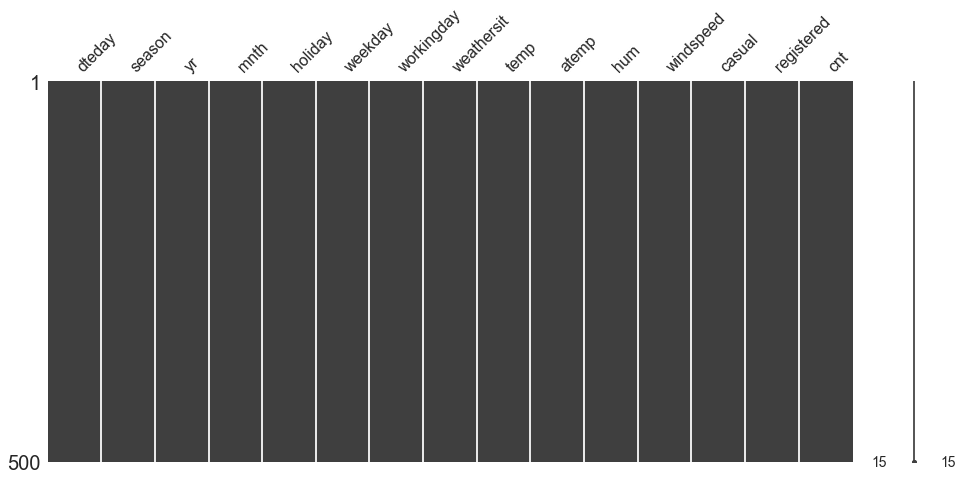

In [8]:
import missingno as msno

msno.matrix(day.sample(500),
           figsize=(16, 7),
           width_ratios=(15, 1))

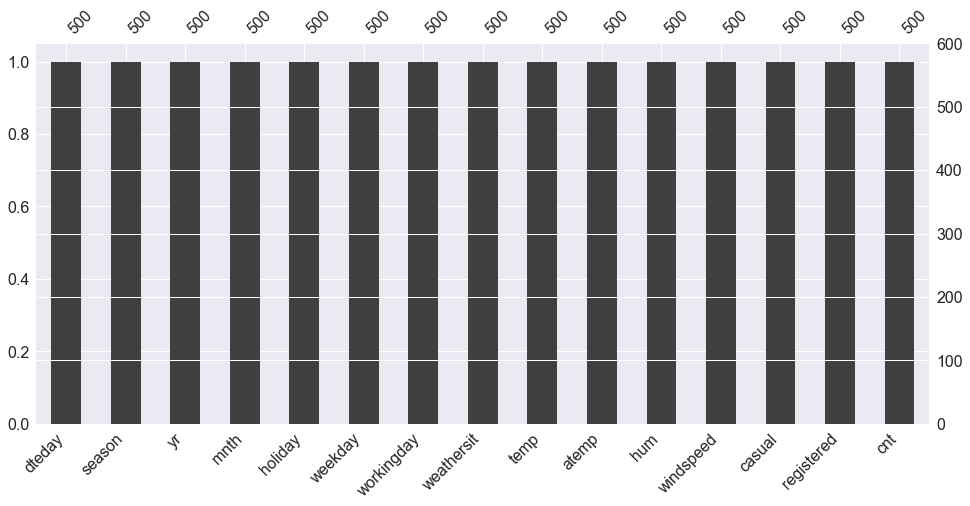

In [9]:
msno.bar(day.sample(500), 
        figsize=(16, 7),
        )

In [10]:
# make dummy variables for the following season, month, holiday, weekday, weatheris, 

day_d = pd.get_dummies(day, columns=['season', 'mnth', 'holiday', 'weekday', 'weathersit'])

In [11]:
day_d.head()

,dteday,yr,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,...,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_1,weathersit_2,weathersit_3
0,2011-01-01,0,0,0.344167,0.363625,0.805833,0.160446,331,654,985,...,0,0,0,0,0,0,1,0,1,0
1,2011-01-02,0,0,0.363478,0.353739,0.696087,0.248539,131,670,801,...,1,0,0,0,0,0,0,0,1,0
2,2011-01-03,0,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,...,0,1,0,0,0,0,0,1,0,0
3,2011-01-04,0,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,...,0,0,1,0,0,0,0,1,0,0
4,2011-01-05,0,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,...,0,0,0,1,0,0,0,1,0,0


In [12]:
day_d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 38 columns):
dteday          731 non-null object
yr              731 non-null int64
workingday      731 non-null int64
temp            731 non-null float64
atemp           731 non-null float64
hum             731 non-null float64
windspeed       731 non-null float64
casual          731 non-null int64
registered      731 non-null int64
cnt             731 non-null int64
season_1        731 non-null uint8
season_2        731 non-null uint8
season_3        731 non-null uint8
season_4        731 non-null uint8
mnth_1          731 non-null uint8
mnth_2          731 non-null uint8
mnth_3          731 non-null uint8
mnth_4          731 non-null uint8
mnth_5          731 non-null uint8
mnth_6          731 non-null uint8
mnth_7          731 non-null uint8
mnth_8          731 non-null uint8
mnth_9          731 non-null uint8
mnth_10         731 non-null uint8
mnth_11         731 non-null uint8
mnth_12    

In [13]:
day.corr()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
season,1.000000,-0.001844,0.831440,-0.010537,-0.003080,0.012485,0.019211,0.334315,0.342876,0.205445,-0.229046,0.210399,0.411623,0.406100
yr,-0.001844,1.000000,-0.001792,0.007954,-0.005461,-0.002013,-0.048727,0.047604,0.046106,-0.110651,-0.011817,0.248546,0.594248,0.566710
mnth,0.831440,-0.001792,1.000000,0.019191,0.009509,-0.005901,0.043528,0.220205,0.227459,0.222204,-0.207502,0.123006,0.293488,0.279977
holiday,-0.010537,0.007954,0.019191,1.000000,-0.101960,-0.253023,-0.034627,-0.028556,-0.032507,-0.015937,0.006292,0.054274,-0.108745,-0.068348
weekday,-0.003080,-0.005461,0.009509,-0.101960,1.000000,0.035790,0.031087,-0.000170,-0.007537,-0.052232,0.014282,0.059923,0.057367,0.067443
workingday,0.012485,-0.002013,-0.005901,-0.253023,0.035790,1.000000,0.061200,0.052660,0.052182,0.024327,-0.018796,-0.518044,0.303907,0.061156
weathersit,0.019211,-0.048727,0.043528,-0.034627,0.031087,0.061200,1.000000,-0.120602,-0.121583,0.591045,0.039511,-0.247353,-0.260388,-0.297391
temp,0.334315,0.047604,0.220205,-0.028556,-0.000170,0.052660,-0.120602,1.000000,0.991702,0.126963,-0.157944,0.543285,0.540012,0.627494
atemp,0.342876,0.046106,0.227459,-0.032507,-0.007537,0.052182,-0.121583,0.991702,1.000000,0.139988,-0.183643,0.543864,0.544192,0.631066
hum,0.205445,-0.110651,0.222204,-0.015937,-0.052232,0.024327,0.591045,0.126963,0.139988,1.000000,-0.248489,-0.077008,-0.091089,-0.100659


In [14]:
day_d.corr()

,yr,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,season_1,...,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_1,weathersit_2,weathersit_3
yr,1.000000,-0.002013,0.047604,0.046106,-0.110651,-0.011817,0.248546,0.594248,0.566710,0.002385,...,0.003340,0.003340,-0.000557,-0.000557,-0.000557,-0.000557,-0.004461,0.029429,-0.003869,-0.073941
workingday,-0.002013,1.000000,0.052660,0.052182,0.024327,-0.018796,-0.518044,0.303907,0.061156,-0.025926,...,-0.602541,0.152529,0.268401,0.268401,0.259978,0.259978,-0.602541,-0.059165,0.050099,0.028820
temp,0.047604,0.052660,1.000000,0.991702,0.126963,-0.157944,0.543285,0.540012,0.627494,-0.619800,...,-0.026323,-0.004333,0.019809,0.020574,0.019941,0.000456,-0.029882,0.116091,-0.097706,-0.058238
atemp,0.046106,0.052182,0.991702,1.000000,0.139988,-0.183643,0.543864,0.544192,0.631066,-0.625061,...,-0.022801,0.000525,0.022465,0.018148,0.020873,-0.008108,-0.030889,0.114951,-0.094253,-0.064727
hum,-0.110651,0.024327,0.126963,0.139988,1.000000,-0.248489,-0.077008,-0.091089,-0.100659,-0.181336,...,-0.000677,0.027861,0.039875,0.050000,-0.052636,-0.040456,-0.023980,-0.575317,0.491834,0.267011
windspeed,-0.011817,-0.018796,-0.157944,-0.183643,-0.248489,1.000000,-0.167613,-0.217449,-0.234545,0.178154,...,-0.010346,0.001081,0.007042,-0.014461,0.005873,-0.021548,0.032266,-0.003964,-0.037408,0.117362
casual,0.248546,-0.518044,0.543285,0.543864,-0.077008,-0.167613,1.000000,0.395282,0.672804,-0.429106,...,0.292542,-0.103883,-0.173315,-0.176305,-0.152672,-0.056915,0.368323,0.221928,-0.167439,-0.166103
registered,0.594248,0.303907,0.540012,0.544192,-0.091089,-0.217449,0.395282,1.000000,0.945517,-0.510300,...,-0.201110,0.002054,0.077920,0.089129,0.109740,0.073615,-0.149954,0.216298,-0.140962,-0.224835
cnt,0.566710,0.061156,0.627494,0.631066,-0.100659,-0.234545,0.672804,0.945517,1.000000,-0.563094,...,-0.058288,-0.035166,0.001328,0.009297,0.034273,0.039118,0.009773,0.252870,-0.172879,-0.239958
season_1,0.002385,-0.025926,-0.619800,-0.625061,-0.181336,0.178154,-0.429106,-0.510300,-0.563094,1.000000,...,0.009049,0.000012,-0.006814,-0.006814,-0.006814,0.002259,0.009049,-0.023951,0.032441,-0.022764


In [15]:
# below are certain correlation plot of the original data to see graphically how some of the variables corrolate
# with Counts

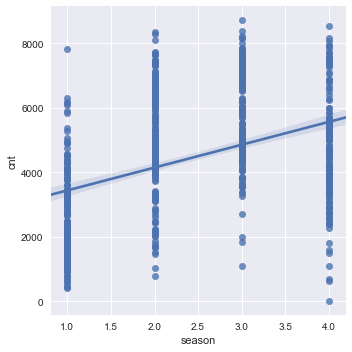

In [16]:
sns.lmplot(x='season', y='cnt', data=day)

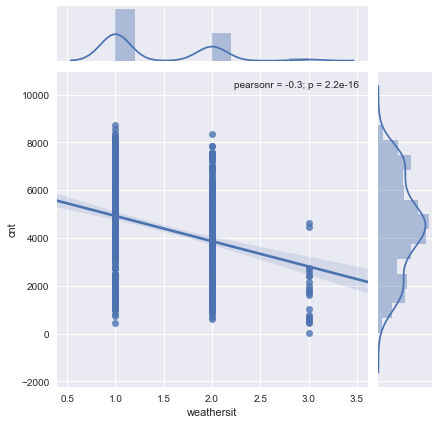

In [17]:
sns.jointplot(x='weathersit', y='cnt', data=day, kind='reg')

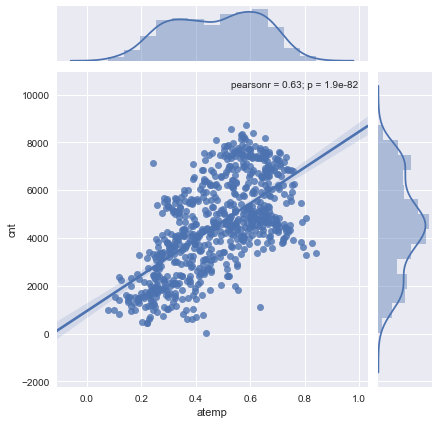

In [18]:
sns.jointplot(x='atemp', y='cnt', data=day, kind='reg')

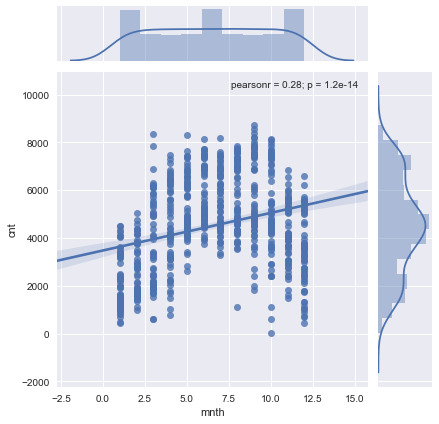

In [19]:
sns.jointplot(x='mnth', y='cnt', data=day, kind='reg')

In [20]:
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
model = ols('cnt ~ atemp', day).fit()

model.summary()

/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.398
Model:                            OLS   Adj. R-squared:                  0.397
Method:                 Least Squares   F-statistic:                     482.5
Date:                Wed, 04 Oct 2017   Prob (F-statistic):           1.85e-82
Time:                        15:09:13   Log-Likelihood:                -6384.0
No. Observations:                 731   AIC:                         1.277e+04
Df Residuals:                     729   BIC:                         1.278e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    945.8240    171.291      5.522      0.000     609.541    1282.107
atemp       7501.8339    341.538     21.965      0.000    6831.318    8172.350
==============================================================================
Omnibus:                       13.710   Durbin-Watson:                   0.475
Prob(Omnibus):                  0.001   Jarque-Bera (JB):                9.448
Skew:                           0.150   Prob(JB):                      0.00888
Kurtosis:                       2.531   Cond. No.                         7.55
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [22]:
# Linear model with original Data Set

X = day.drop(['dteday','cnt', 'registered', 'casual'], axis=1)
y = day['cnt']

In [23]:
lm = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)


In [24]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [25]:
lm.score(X_train, y_train)

0.79108518504658876

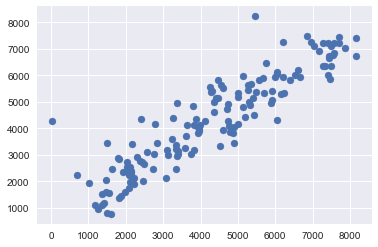

In [26]:
plt.scatter(y_test, lm.predict(X_test))

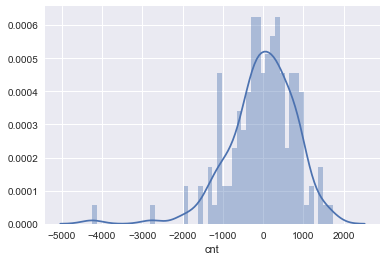

In [27]:
sns.distplot(y_test - lm.predict(X_test), bins=50)

In [28]:
# predicted value of X_train and X_test
y_train_pred = lm.predict(X_train)
y_test_pred = lm.predict(X_test)

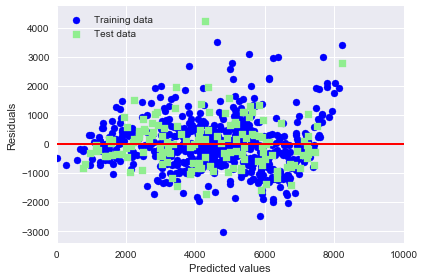

In [29]:
plt.scatter(y_train_pred,  y_train_pred - y_train,
            c='blue', marker='o', label='Training data')
plt.scatter(y_test_pred,  y_test_pred - y_test,
            c='lightgreen', marker='s', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=0, xmax=10000, lw=2, color='red')
plt.xlim([0, 10000])
plt.tight_layout()

plt.show()

In [30]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))


MSE train: 765819.361, test: 691035.008
R^2 train: 0.791, test: 0.828


In [31]:
# Now we will create linear model as above but using dummie variables that were craeated above.  
day_d.columns

Index(['dteday', 'yr', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt', 'season_1', 'season_2', 'season_3',
       'season_4', 'mnth_1', 'mnth_2', 'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6',
       'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11', 'mnth_12',
       'holiday_0', 'holiday_1', 'weekday_0', 'weekday_1', 'weekday_2',
       'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6', 'weathersit_1',
       'weathersit_2', 'weathersit_3'],
      dtype='object')

In [32]:
X_d = day_d.drop(['cnt', 'dteday', 'registered', 'casual'], axis=1)
y_d = day_d['cnt']

lm_d = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X_d, y_d, test_size=0.2,random_state=42)
lm_d.fit(X_train, y_train)
    

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [33]:
lm_d.score(X_train, y_train)

0.84073921531597562

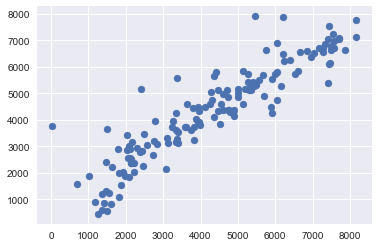

In [34]:
plt.scatter(y_test, lm_d.predict(X_test))

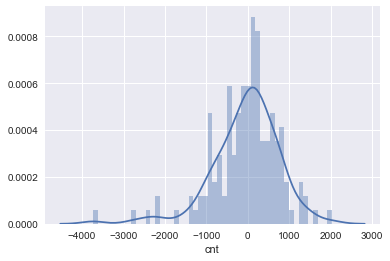

In [35]:
sns.distplot(y_test - lm_d.predict(X_test), bins=50)

In [36]:
# predicted value of X_train and X_test
y_train_pred = lm_d.predict(X_train)
y_test_pred = lm_d.predict(X_test)

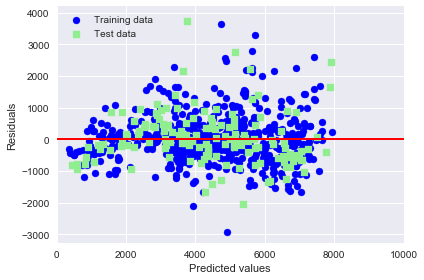

In [37]:
plt.scatter(y_train_pred,  y_train_pred - y_train,
            c='blue', marker='o', label='Training data')
plt.scatter(y_test_pred,  y_test_pred - y_test,
            c='lightgreen', marker='s', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=0, xmax=10000, lw=2, color='red')
plt.xlim([0, 10000])
plt.tight_layout()

plt.show()

In [38]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))


MSE train: 583802.505, test: 664133.129
R^2 train: 0.841, test: 0.834


In [39]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_season_std = sc.transform(X_train)
X_test_season_std = sc.transform(X_test)

In [40]:
lm_d.fit(X_train_season_std, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [41]:
lm_d.score(X_train_season_std, y_train)

0.84685192891781225

### Question 2

    -In the last question you used all your engineered features in making your model. Was this a good idea? Are some of your features correlated and did you discover this during preprocessing? Is your model suffering from the curse of dimensionality with many features, some of which don’t provide additional value since they are correlated? Often, we think of correlated features as both being numeric. However, sometimes a categorical variable can contain similar information to a numeric variable. Perform a logistic regression or other classification model of season on month, temperature, humidity, windspeed, or any other predictor variable you think correlates with season. Is the season variable readily explained by other predictor variables?



### Perform a logistic regression or other classification model of season on month, temperature, humidity, windspeed, or any other predictor variable you think correlates with season.


In [42]:
day.columns

Index(['dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt'],
      dtype='object')

In [43]:
X_season = day[['mnth', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed']]

y_season = day['season']

X_train, X_test, y_train, y_test = train_test_split(X_season, y_season, test_size=0.20, random_state=42)

In [44]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_season_std = sc.transform(X_train)
X_test_season_std = sc.transform(X_test)

In [45]:
# implementing Logistic Regression:

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=100, random_state =1, multi_class='multinomial', solver='newton-cg')
lr.fit(X_train_season_std, y_train)


LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=1, solver='newton-cg',
          tol=0.0001, verbose=0, warm_start=False)

In [46]:
X_train_season_std.shape

(584, 6)

In [47]:
lr.predict(X_train_season_std)

array([4, 3, 4, 4, 3, 2, 3, 1, 4, 1, 3, 4, 2, 2, 2, 4, 4, 1, 2, 2, 1, 4, 3,
       3, 3, 1, 1, 2, 2, 1, 3, 2, 1, 1, 2, 3, 4, 4, 4, 3, 1, 4, 1, 2, 1, 4,
       2, 1, 1, 3, 1, 1, 3, 3, 2, 4, 3, 3, 4, 2, 4, 4, 3, 4, 3, 2, 1, 2, 4,
       2, 2, 3, 2, 3, 4, 4, 2, 1, 3, 2, 1, 1, 4, 2, 1, 2, 4, 3, 4, 4, 1, 1,
       1, 3, 1, 4, 4, 3, 3, 1, 1, 1, 2, 1, 1, 1, 1, 2, 3, 4, 1, 3, 2, 2, 2,
       4, 2, 3, 4, 1, 1, 3, 3, 4, 2, 2, 4, 4, 1, 1, 3, 1, 3, 1, 4, 1, 3, 3,
       2, 2, 4, 1, 1, 4, 3, 3, 4, 2, 1, 1, 4, 2, 1, 3, 3, 3, 1, 4, 2, 2, 3,
       4, 3, 1, 4, 4, 3, 3, 4, 2, 3, 4, 4, 4, 4, 2, 2, 1, 2, 4, 2, 3, 2, 4,
       4, 1, 4, 3, 4, 3, 2, 1, 4, 2, 2, 2, 4, 2, 4, 3, 4, 3, 1, 4, 2, 2, 3,
       3, 3, 1, 1, 1, 4, 4, 4, 4, 4, 2, 2, 2, 4, 1, 3, 3, 4, 4, 1, 4, 4, 1,
       3, 3, 1, 3, 3, 4, 2, 4, 2, 2, 2, 4, 4, 2, 4, 3, 4, 4, 1, 2, 3, 4, 1,
       4, 4, 3, 4, 4, 3, 4, 4, 1, 2, 3, 1, 2, 3, 4, 2, 4, 2, 1, 4, 1, 2, 3,
       2, 1, 2, 4, 1, 1, 2, 3, 4, 4, 4, 2, 4, 2, 3, 1, 3, 4, 2, 1, 4, 3, 1,
       3, 3,

In [48]:
data = pd.DataFrame({'predict': lr.predict(X_train_season_std), 'y_train':y_train})
data.head()


,predict,y_train
682,4,4
250,3,3
336,4,4
260,4,3
543,3,3


In [49]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_train, lr.predict(X_train_season_std)))
print(accuracy_score(y_test, lr.predict(X_test_season_std)))

0.845890410959
0.795918367347


In [50]:
X_d_season = day_d.drop(['season_1', 'season_2', 'season_3',
       'season_4', 'dteday'], axis=1)
y_d_season = day['season'].values

X_train, X_test, y_train, y_test = train_test_split(X_d_season, y_d_season, test_size=0.2,random_state=42)
    

In [51]:
sc = StandardScaler()
sc.fit(X_train)
X_train_season_std = sc.transform(X_train)
X_test_season_std = sc.transform(X_test)


lr = LogisticRegression(C=100, random_state =1, multi_class='multinomial', solver='newton-cg' )
lr.fit(X_train_season_std, y_train)


LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=1, solver='newton-cg',
          tol=0.0001, verbose=0, warm_start=False)

In [52]:
X_train_season_std.shape

(584, 33)

In [53]:
y_train.shape

(584,)

In [54]:
print(accuracy_score(y_train, lr.predict(X_train_season_std)))
print(accuracy_score(y_test, lr.predict(X_test_season_std)))

0.946917808219
0.87074829932


In [55]:
# we can also use a KNN 
 
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
knn.fit(X_train_season_std, y_train)



KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [56]:
from sklearn.metrics import accuracy_score

# loop through for test accuracy

for k in [1, 3, 5]:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_season_std, y_train)
    y_pred = knn.predict(X_test_season_std)
    print("Accuracy is ", accuracy_score(y_test, y_pred) * 100, "% for k:", k)


Accuracy is  80.9523809524 % for k: 1
Accuracy is  77.5510204082 % for k: 3
Accuracy is  80.9523809524 % for k: 5


In [57]:
# for both test and train accuracy:

for n in range(20):
    k = n + 1
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train_season_std, y_train)

    train_accuracy = knn.score(X_train_season_std, y_train)
    test_accuracy = knn.score(X_test_season_std, y_test)

    print('n_neighbors = ', n)
    print('Train Accuracy: ', train_accuracy)
    print('Test Accuracy: ', test_accuracy, '\n')


n_neighbors =  0
Train Accuracy:  1.0
Test Accuracy:  0.809523809524 

n_neighbors =  1
Train Accuracy:  0.922945205479
Test Accuracy:  0.795918367347 

n_neighbors =  2
Train Accuracy:  0.919520547945
Test Accuracy:  0.775510204082 

n_neighbors =  3
Train Accuracy:  0.91095890411
Test Accuracy:  0.823129251701 

n_neighbors =  4
Train Accuracy:  0.890410958904
Test Accuracy:  0.809523809524 

n_neighbors =  5
Train Accuracy:  0.904109589041
Test Accuracy:  0.829931972789 

n_neighbors =  6
Train Accuracy:  0.904109589041
Test Accuracy:  0.802721088435 

n_neighbors =  7
Train Accuracy:  0.89897260274
Test Accuracy:  0.836734693878 

n_neighbors =  8
Train Accuracy:  0.892123287671
Test Accuracy:  0.823129251701 

n_neighbors =  9
Train Accuracy:  0.890410958904
Test Accuracy:  0.836734693878 

n_neighbors =  10
Train Accuracy:  0.878424657534
Test Accuracy:  0.823129251701 

n_neighbors =  11
Train Accuracy:  0.888698630137
Test Accuracy:  0.836734693878 

n_neighbors =  12
Train Acc

In [58]:
day_d.columns

Index(['dteday', 'yr', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt', 'season_1', 'season_2', 'season_3',
       'season_4', 'mnth_1', 'mnth_2', 'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6',
       'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11', 'mnth_12',
       'holiday_0', 'holiday_1', 'weekday_0', 'weekday_1', 'weekday_2',
       'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6', 'weathersit_1',
       'weathersit_2', 'weathersit_3'],
      dtype='object')

In [59]:
X_d_season = day_d.drop(['season_1', 'season_2', 'season_3',
       'season_4', 'dteday'], axis=1)
y_d_season = day_d[['season_1', 'season_2', 'season_3',
       'season_4']]

X_train, X_test, y_train, y_test = train_test_split(X_d_season, y_d_season, test_size=0.2,random_state=42)
    

In [60]:
std_d_season = StandardScaler()
std_d_season.fit(X_train)
X_train_std_d_season = std_d_season.transform(X_train)
X_test_std_d_season = std_d_season.transform(X_test)

In [61]:
# we can also standardize KNN with dummy variables.  
for n in range(20):
    k = n + 1
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train_std_d_season, y_train)

    train_accuracy = knn.score(X_train_std_d_season, y_train)
    test_accuracy = knn.score(X_test_std_d_season, y_test)

    print('n_neighbors = ', n)
    print('Train Accuracy: ', train_accuracy)
    print('Test Accuracy: ', test_accuracy, '\n')


n_neighbors =  0
Train Accuracy:  1.0
Test Accuracy:  0.809523809524 

n_neighbors =  1
Train Accuracy:  0.833904109589
Test Accuracy:  0.680272108844 

n_neighbors =  2
Train Accuracy:  0.916095890411
Test Accuracy:  0.775510204082 

n_neighbors =  3
Train Accuracy:  0.833904109589
Test Accuracy:  0.700680272109 

n_neighbors =  4
Train Accuracy:  0.883561643836
Test Accuracy:  0.795918367347 

n_neighbors =  5
Train Accuracy:  0.837328767123
Test Accuracy:  0.727891156463 

n_neighbors =  6
Train Accuracy:  0.888698630137
Test Accuracy:  0.802721088435 

n_neighbors =  7
Train Accuracy:  0.847602739726
Test Accuracy:  0.768707482993 

n_neighbors =  8
Train Accuracy:  0.878424657534
Test Accuracy:  0.823129251701 

n_neighbors =  9
Train Accuracy:  0.840753424658
Test Accuracy:  0.78231292517 

n_neighbors =  10
Train Accuracy:  0.859589041096
Test Accuracy:  0.802721088435 

n_neighbors =  11
Train Accuracy:  0.83904109589
Test Accuracy:  0.802721088435 

n_neighbors =  12
Train Acc

### Question 3

    – Do feature selection by hand (motivated by question 2), through stepwise regression, or do dimensionality reduction. What is your R2, RSE, or other measure of model fit? What about your validation or cross validation RMSE? How does this RMSE compare to the benchmark of question 1?



In [62]:
day_d.columns

Index(['dteday', 'yr', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt', 'season_1', 'season_2', 'season_3',
       'season_4', 'mnth_1', 'mnth_2', 'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6',
       'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11', 'mnth_12',
       'holiday_0', 'holiday_1', 'weekday_0', 'weekday_1', 'weekday_2',
       'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6', 'weathersit_1',
       'weathersit_2', 'weathersit_3'],
      dtype='object')

In [63]:
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import  train_test_split

X_d_season = day_d.drop(['season_1', 'season_2', 'season_3',
       'season_4', 'dteday'], axis=1)
y_d_season = day_d[['season_1', 'season_2', 'season_3',
       'season_4']]

X_train, X_test, y_train, y_test = train_test_split(X_d_season, y_d_season, test_size=0.2,random_state=42)
    

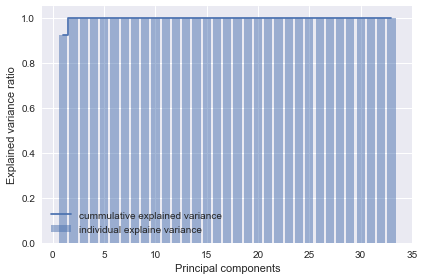

In [64]:
pca = PCA()
pca.fit(X_train)
exp_var = pca.explained_variance_ratio_ 
exp_var_sum = np.cumsum(exp_var)

# plot explained variance ratio:

plt.bar(range(1, len(exp_var) + 1), exp_var_sum, alpha = 0.5, align='center',
       label='individual explaine variance')
plt.step(range(1, len(exp_var) + 1), exp_var_sum, where = 'mid',
        label='cummulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [65]:
print('Explaine Variance: ', pca.explained_variance_)
print('Explained Variance ratio: ', pca.explained_variance_ratio_)
print('Mean: ', pca.mean_)
print('\nLoading\n', pca.components_)

Explaine Variance:  [  6.01456423e+06   4.86692405e+05   4.33198437e-01   2.41584151e-01
   1.52808530e-01   1.51179399e-01   1.44517980e-01   1.42283165e-01
   1.38168413e-01   1.12572408e-01   9.28572881e-02   9.09755923e-02
   8.72164985e-02   8.63307737e-02   8.58319743e-02   8.18441674e-02
   8.05681423e-02   7.67315867e-02   7.30987378e-02   5.85695810e-02
   5.16571927e-02   4.95095039e-02   2.52903656e-02   1.15852892e-02
   5.37518389e-03   4.06416142e-03   2.32099890e-04   1.18616364e-24
   4.06423251e-26   4.06423251e-26   4.06423251e-26   4.06423251e-26
   1.36787157e-26]
Explained Variance ratio:  [  9.25138366e-01   7.48612533e-02   6.66330060e-08   3.71595943e-08
   2.35044517e-08   2.32538646e-08   2.22292293e-08   2.18854783e-08
   2.12525622e-08   1.73154778e-08   1.42829699e-08   1.39935343e-08
   1.34153242e-08   1.32790852e-08   1.32023617e-08   1.25889718e-08
   1.23926982e-08   1.18025732e-08   1.12437816e-08   9.00895965e-09
   7.94572125e-09   7.61537159e-09   

In [66]:
X_season = day[['mnth', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed']]

y_season = day['season']

X_train, X_test, y_train, y_test = train_test_split(X_season, y_season, test_size=0.20, random_state=42)

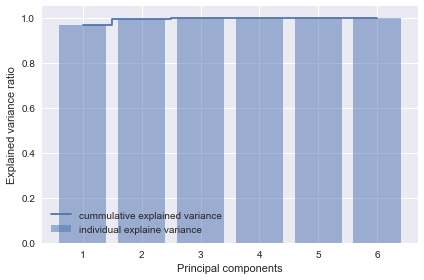

In [67]:
    
pca = PCA()
pca.fit(X_train)
exp_var = pca.explained_variance_ratio_ 
exp_var_sum = np.cumsum(exp_var)

# plot explained variance ratio:

plt.bar(range(1, len(exp_var) + 1), exp_var_sum, alpha = 0.5, align='center',
       label='individual explaine variance')
plt.step(range(1, len(exp_var) + 1), exp_var_sum, where = 'mid',
        label='cummulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [68]:
# We can use PCA on the entire data set that predicts cnts

X_d = day_d.drop(['cnt', 'dteday', 'registered', 'casual'], axis=1)
y_d = day_d['cnt']

lm_d = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X_d, y_d, test_size=0.2,random_state=42)

    

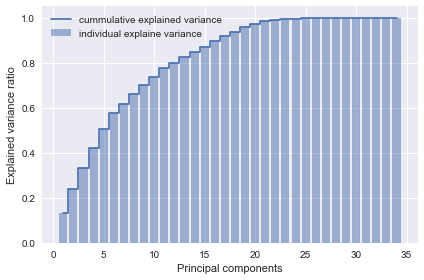

In [69]:
pca = PCA()
pca.fit(X_train)
exp_var = pca.explained_variance_ratio_ 
exp_var_sum = np.cumsum(exp_var)

# plot explained variance ratio:

plt.bar(range(1, len(exp_var) + 1), exp_var_sum, alpha = 0.5, align='center',
       label='individual explaine variance')
plt.step(range(1, len(exp_var) + 1), exp_var_sum, where = 'mid',
        label='cummulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [103]:
day.columns

Index(['dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt'],
      dtype='object')

In [104]:
day_d.columns

Index(['dteday', 'yr', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt', 'season_1', 'season_2', 'season_3',
       'season_4', 'mnth_1', 'mnth_2', 'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6',
       'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11', 'mnth_12',
       'holiday_0', 'holiday_1', 'weekday_0', 'weekday_1', 'weekday_2',
       'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6', 'weathersit_1',
       'weathersit_2', 'weathersit_3'],
      dtype='object')

In [106]:


# multiclass LR with PCA

from sklearn.decomposition import PCA

X_s = day_d.drop(['dteday', 'season_1', 'season_2', 'season_3',
       'season_4'], axis=1)
y_s = day['season'].values

X_train, X_test, y_train, y_test = train_test_split(X_s, y_s, test_size=0.20, random_state=42)

pca = PCA(n_components=2)
lr = LogisticRegression()
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)



In [107]:
lr.fit(X_train_pca, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [108]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.6, 
                    c=cmap(idx),
                    edgecolor='black',
                    marker=markers[idx], 
                    label=cl)

In [ ]:
plot_decision_regions(X_train_pca, y_train, classifier=lr)
>>> plt.xlabel('PC 1')
>>> plt.ylabel('PC 2')
>>> plt.legend(loc='lower left')
>>> plt.show()

IndexError: tuple index out of range

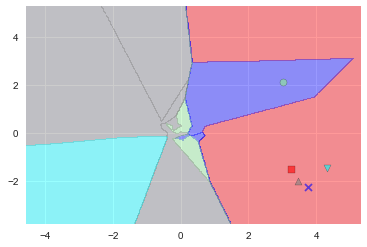

In [74]:
plot_decision_regions(X_test_pca, y_test, classifier=lr)
>>> plt.xlabel('PC1')
>>> plt.ylabel('PC2')
>>> plt.legend(loc='lower left')
>>> plt.show()


In [75]:
day.columns

Index(['dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt'],
      dtype='object')

In [77]:
# using pca againsg orignal data set 

X_pca = day_d.drop(['dteday', 'cnt', 'registered', 'casual'], axis=1)
y_pca = day_d['cnt']

X_train, X_test, y_train, y_test = train_test_split(X_pca, y_pca,test_size=0.20, random_state=42, )

sc = StandardScaler()
X_train_std_pca= sc.fit_transform(X_train)
X_test_std_pca = sc.transform(X_test)

pca = PCA(n_components=2)
lr = LogisticRegression()
X_train_pca = pca.fit_transform(X_train_std_pca)
X_test_pca = pca.transform(X_test_std_pca)
lr.fit(X_train_pca, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [78]:
>>> pca = PCA(n_components=None)
>>> X_train_pca = pca.fit_transform(X_train_season_std)
>>> pca.explained_variance_ratio_


array([  1.41018743e-01,   8.41314989e-02,   7.18310121e-02,
         6.59599085e-02,   5.14303789e-02,   4.09537610e-02,
         3.95852463e-02,   3.67920404e-02,   3.65059745e-02,
         3.62177556e-02,   3.41140465e-02,   3.34487477e-02,
         3.32613224e-02,   3.30621100e-02,   3.28694400e-02,
         3.26390998e-02,   3.18486749e-02,   3.15534184e-02,
         3.08564100e-02,   2.79070036e-02,   2.71561096e-02,
         2.24679149e-02,   1.09700951e-02,   6.01222710e-03,
         3.73548122e-03,   3.43245468e-03,   2.39124867e-04,
         2.78110433e-32,   2.14257896e-33,   1.81027289e-33,
         1.44005178e-33,   7.89098588e-34,   2.30416359e-34])

### Question 4

    – Pick another model type entirely such as knn, decision trees, or random forest. Consider that certain algorithms such as decision trees do feature selection for you while knn does not. Can you improve upon the performance compared to question 1 or 3? Which algorithm performed best and why? How do you define? Now take a look at test set error and compare you models there as well.

In [90]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import GridSearchCV

X_train, X_test, y_train, y_test = \
    train_test_split(X_d_season, y_d_season, test_size=0.3, random_state=0)
    
    

In [91]:
knn_pipe = Pipeline([('pca', PCA()), ('clf', KNeighborsClassifier())])
rf_pipe = Pipeline([('pca', PCA()), ('clf', RandomForestClassifier())])
dt_pipe = Pipeline([('pca', PCA()), ('clf', DecisionTreeClassifier())])

In [92]:
clf_list = [('knn', KNeighborsClassifier()), ('rf', RandomForestClassifier()), ('dtf', DecisionTreeClassifier())]

# ensemble:

eclf_s = VotingClassifier(estimators=clf_list, voting='soft')
eclf_h = VotingClassifier(estimators=clf_list, voting='hard')

In [93]:
# tune KNN paramters using search grid:

param_grid = dict(pca__n_components = np.arange(1, 19, 1), clf__n_neighbors = np.arange(5, 21, 1))
grid_search = GridSearchCV(knn_pipe, param_grid=param_grid)
grid_search.fit(X_train, y_train)

print('Best parameters: ', grid_search.best_params_)
print('Best CV score', grid_search.best_score_)
print('Best Test Score: ', grid_search.score(X_test, y_test))

Best parameters:  {'clf__n_neighbors': 5, 'pca__n_components': 2}
Best CV score 0.430528375734
Best Test Score:  0.427272727273


In [94]:
# tune rf parameters (Random forest )
param_grid = dict(pca__n_components = np.arange(1, 19, 1), clf__n_estimators = [10, 50, 100, 150, 200])
grid_search = GridSearchCV(rf_pipe, param_grid=param_grid)
grid_search.fit(X_train, y_train)

print('Best parameters: ', grid_search.best_params_)
print('Best CV score', grid_search.best_score_)
print('Best Test Score: ', grid_search.score(X_test, y_test))

Best parameters:  {'clf__n_estimators': 150, 'pca__n_components': 18}
Best CV score 0.821917808219
Best Test Score:  0.836363636364


In [95]:
# with standardized data.  

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)



In [96]:
# tune KNN paramters using search grid and standardicing data

param_grid = dict(pca__n_components = np.arange(1, 19, 1), clf__n_neighbors = np.arange(5, 21, 1))
grid_search = GridSearchCV(knn_pipe, param_grid=param_grid)
grid_search.fit(X_train_std, y_train)

print('Best parameters: ', grid_search.best_params_)
print('Best CV score', grid_search.best_score_)
print('Best Test Score: ', grid_search.score(X_test_std, y_test))

Best parameters:  {'clf__n_neighbors': 15, 'pca__n_components': 18}
Best CV score 0.79843444227
Best Test Score:  0.804545454545


In [97]:
# tune Random forest with standardized data

param_grid = dict(pca__n_components = np.arange(1, 19, 1), clf__n_estimators = [10, 50, 100, 150, 200])
grid_search = GridSearchCV(rf_pipe, param_grid=param_grid)
grid_search.fit(X_train_std, y_train)

print('Best parameters: ', grid_search.best_params_)
print('Best CV score', grid_search.best_score_)
print('Best Test Score: ', grid_search.score(X_test_std, y_test))


Best parameters:  {'clf__n_estimators': 50, 'pca__n_components': 18}
Best CV score 0.794520547945
Best Test Score:  0.809090909091


In [101]:
gs = GridSearchCV(estimator=DecisionTreeClassifier(random_state=0), 
                 param_grid = [{'max_depth': [1, 2, 4, 5, 6, 7, None]}], 
                 scoring='accuracy', cv=5)
gs.fit(X_train, y_train)
print('Best parameters: ', gs.best_params_)
print('Best CV Score', gs.best_score_)
print('Best Test Score', gs.score(X_test, y_test))

Best parameters:  {'max_depth': 7}
Best CV Score 0.86301369863
Best Test Score 0.836363636364


In [102]:
gs = GridSearchCV(estimator=DecisionTreeClassifier(random_state=0), 
                 param_grid = [{'max_depth': [1, 2, 4, 5, 6, 7, None]}], 
                 scoring='accuracy', cv=5)
gs.fit(X_train_std, y_train)
print('Best parameters', gs.best_params_)
print('Best CV Score ', gs.best_score_)
print('Best Test Score', gs.score(X_test_std, y_test))

Best parameters {'max_depth': 7}
Best CV Score  0.86301369863
Best Test Score 0.836363636364
